In [2]:
import pandas as pd
import neuron
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import *

file_names = ['dff', 'swim', 'stimuli', 'centroids', 'MainReg', 'BrainRegions', 'BrainRegions_names', 'genes', 'gene_names'] # All files with data

data = processed_data_map # Get data that is pre-loaded in the load_data.py file
dff = data['dff']
swim = data['swim']
brain_regions = data['BrainRegions']
stimuli = data['stimuli'].to_numpy()

In [412]:
def get_correlation(d, f):
    corr = np.zeros(len(d))
    p_values = []
    for i in range(len(d)):
        D = d
        statistic, p_value = correlation(D[i,:], f)
        p_values.append(p_value)
        corr[i] = statistic
    return corr, p_values

In [264]:
# dgg = (brain_regions[0].values == True)

In [265]:
# genes = pd.DataFrame(data['genes'].to_numpy(), columns=data['gene_names'][0].values)
# genes['neurons'] = genes.index
# to_plot_genes = genes[:5]
# to_plot_genes
# x = np.arange(len(to_plot_genes))
# to_plot_genes.plot(x='neurons', y=data['gene_names'][0].values, kind="line", figsize=(10, 10))

In [408]:
# Step 1: find the second block
dff = data['dff']
n, t = dff.shape
indx = t//10
second_block = dff.to_numpy()[:, indx+1:(indx*2) + 1]
_second_block = dff.to_numpy()
pdd = pd.DataFrame(second_block)
_pdd = pd.DataFrame(_second_block)

# Creating the left loom
loom_index = indx//8
loom_left = pd.DataFrame(pdd.to_numpy()[:,-loom_index:])
_loom_left = _pdd.to_numpy()

In [344]:
brain_region_names = data['BrainRegions_names']
# find brain region of interest(tectum)
region_of_interest_index = None
for i, brain_reg_name in enumerate(brain_region_names[0].values):
    if brain_reg_name == 'tectum':
        region_of_interest_index = i

tectum = brain_regions.to_numpy()[:, region_of_interest_index]
tectum_ones, = np.where(tectum == 1)
tectum_ones.shape

(36820,)

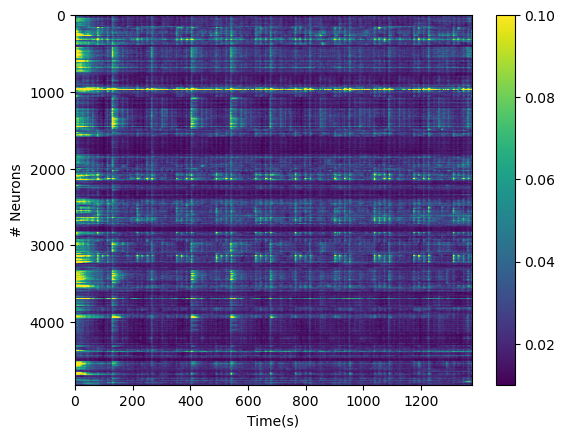

In [413]:
# left_loom_stim = stimuli[7, indx+1:(indx*2) + 1][-loom_index:]/50
_left_loom_stim = stimuli[7, :]/50
all_left_loom = _loom_left[tectum_ones,:]
max_corr_loom_left, left_p_values = get_correlation(all_left_loom, _left_loom_stim)
median_loom_left = np.median(max_corr_loom_left)
std_loom_left = np.std(max_corr_loom_left)
thresh_left = median_loom_left + std_loom_left#*2

# max_corr_right_loom, right_p_values = get_correlation(loom_right)
left_loom_indices,  = np.where(max_corr_loom_left > thresh_left)
respond_to_left_loom = all_left_loom[left_loom_indices,:]
plt.imshow(respond_to_left_loom, aspect='auto',interpolation=None, vmin=0.01, vmax=0.1)
plt.xlabel('Time(s)')
plt.ylabel('# Neurons')
plt.colorbar()
plt.show()


In [407]:
left_loom_indices.shape

(4814,)

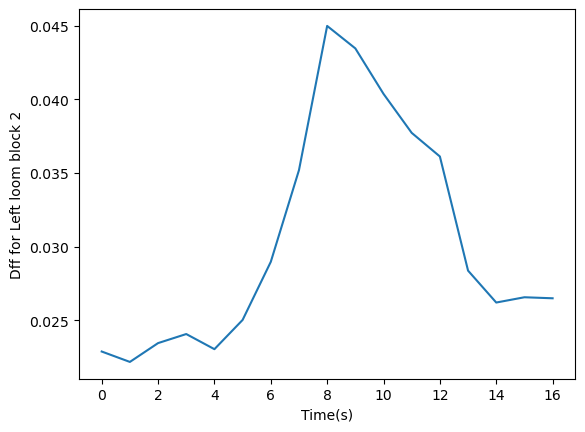

In [335]:
xleft = respond_to_left_loom.mean(axis=0)
plt.plot(xleft)
plt.xlabel('Time(s)')
plt.ylabel('Dff for Left loom block 2')
plt.show()

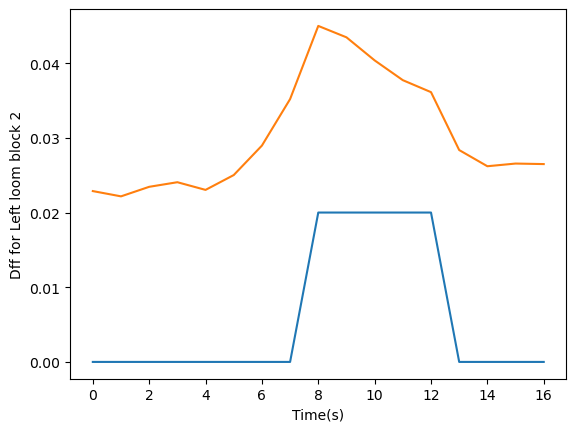

In [270]:
xleft = respond_to_left_loom.mean(axis=0)
plt.plot(stimuli[7, indx+1:(indx*2) + 1][-loom_index:]/50)
plt.plot(xleft)
plt.xlabel('Time(s)')
plt.ylabel('Dff for Left loom block 2')
plt.show()

In [414]:
# Creating the right loom
loom_right = pd.DataFrame(pdd.to_numpy()[:,-(loom_index*2):-loom_index])
_loom_right = _pdd.to_numpy()

(array([9.3000e+01, 4.1010e+03, 2.2511e+04, 8.8700e+03, 9.6900e+02,
        1.9800e+02, 5.5000e+01, 1.4000e+01, 7.0000e+00, 2.0000e+00]),
 array([-0.18901777, -0.11858016, -0.04814256,  0.02229505,  0.09273266,
         0.16317027,  0.23360788,  0.30404548,  0.37448309,  0.4449207 ,
         0.51535831]),
 <BarContainer object of 10 artists>)

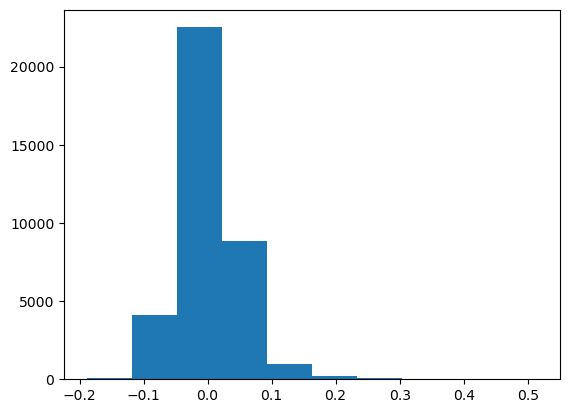

In [421]:
plt.hist(max_corr_loom_right)

In [422]:
std_loom_right

0.0

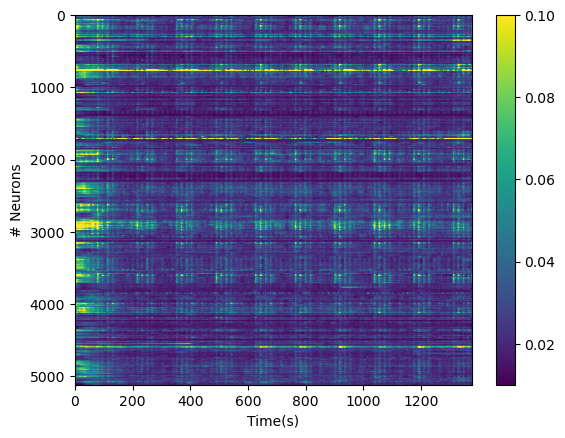

In [423]:
right_loom_stim = stimuli[6, indx+1:(indx*2) + 1][-(loom_index*2):-loom_index]/50
_right_loom_stim = stimuli[6, :]/50
all_right_loom = _loom_right[tectum_ones,:]
max_corr_loom_right, right_p_values = get_correlation(all_right_loom, _right_loom_stim)
median_loom_right = np.median(max_corr_loom_right)
std_loom_right = np.std(max_corr_loom_right)
thresh_right = median_loom_right + std_loom_right

# max_corr_right_loom, right_p_values = get_correlation(loom_right)
right_loom_indices,  = np.where(max_corr_loom_right > thresh_right)
respond_to_right_loom = all_right_loom[right_loom_indices,:]
plt.imshow(respond_to_right_loom, aspect='auto',interpolation=None, vmin=0.01, vmax=0.1)
plt.xlabel('Time(s)')
plt.ylabel('# Neurons')
plt.colorbar()
plt.show()

In [424]:
right_loom_indices.shape

(5121,)

In [425]:
max_corr_loom_right.shape

(36820,)

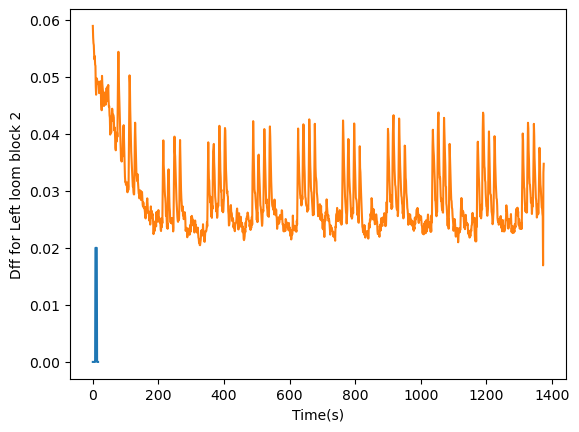

In [426]:
xright = respond_to_right_loom.mean(axis=0)
plt.plot(right_loom_stim)
plt.plot(xright)
plt.xlabel('Time(s)')
plt.ylabel('Dff for Left loom block 2')
plt.show()

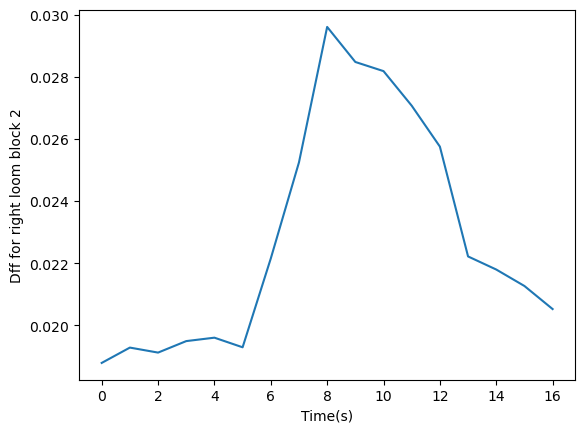

In [275]:
xright = respond_to_right_loom.mean(axis=0)
plt.plot(xright)
plt.xlabel('Time(s)')
plt.ylabel('Dff for right loom block 2')
plt.show()

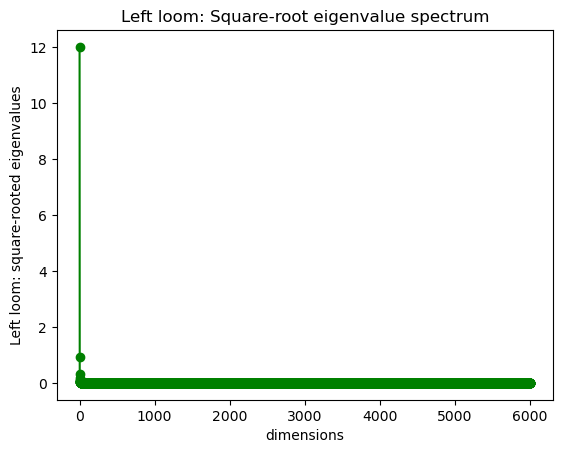

In [277]:
# Performing PCA for left loom -> Dimensionality reduction
n, d = respond_to_left_loom.shape
fnd = respond_to_left_loom.T.to_numpy()
# U, D, _ = pca(fnd)
# U, D = pca(respond_to_left_loom[:1000].T)

# #plot the square-root eigenvalue spectrum
fig = plt.figure()
plt.plot(D,'-o',color='green')
plt.xlabel('dimensions')
plt.ylabel('Left loom: square-rooted eigenvalues')
plt.title('Left loom: Square-root eigenvalue spectrum')
plt.show()

In [389]:
percent_var = 100 * np.sum(D[:4])/np.sum(D)
print('percent variance explained = ', percent_var)

percent variance explained =  (96.26042046424517-4.3099107486378663e-16j)


In [385]:
D.shape

(6010,)

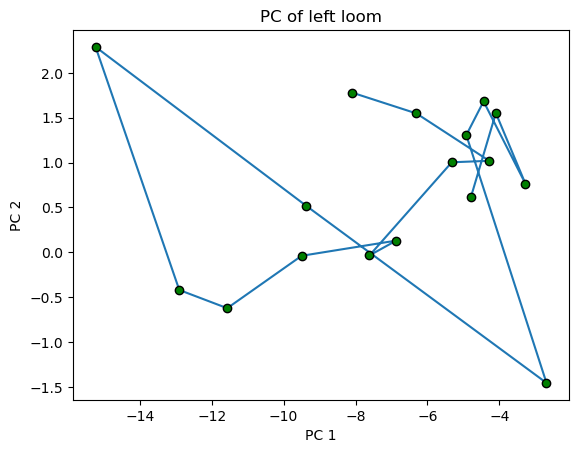

In [211]:
plt.plot(fnd@U[:,0],fnd@U[:,1], '-o', mfc='green', mec='k')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PC of left loom')
plt.show()

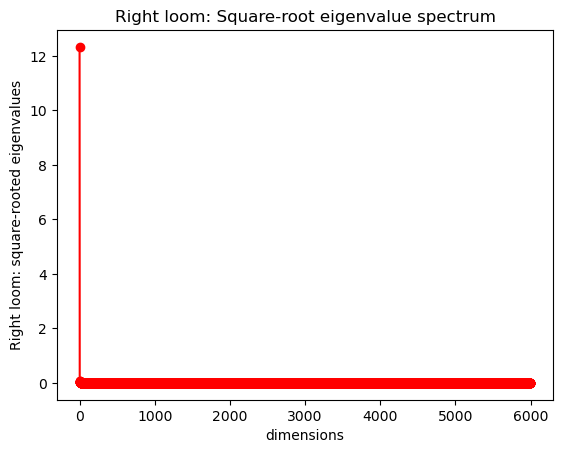

In [278]:
# Performing PCA right loom -> Dimensionality reduction
n_right, d_right = respond_to_right_loom.shape
fnd_right = respond_to_right_loom.T.to_numpy()[:,:6000] # Just pick 6000 neurons
# U_right, D_right, indyy = pca(fnd_right)
# U, D = pca(respond_to_left_loom[:1000].T)

# #plot the square-root eigenvalue spectrum
fig = plt.figure()
plt.plot(D_right,'-o',color='red')
plt.xlabel('dimensions')
plt.ylabel('Right loom: square-rooted eigenvalues')
plt.title('Right loom: Square-root eigenvalue spectrum')
plt.show()

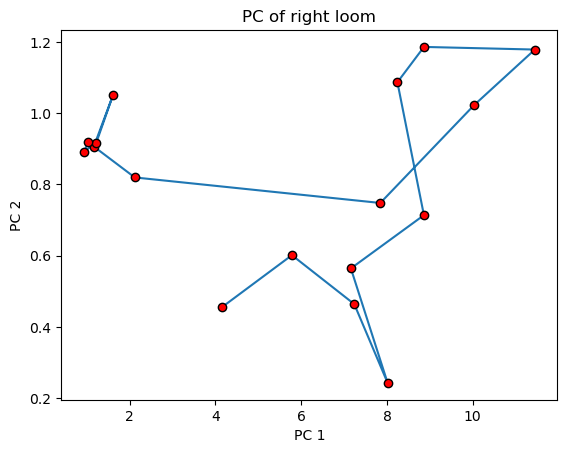

In [279]:
plt.plot(fnd_right@U_right[:,0],fnd_right@U_right[:,1], '-o', mfc='red', mec='k')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PC of right loom')
plt.show()

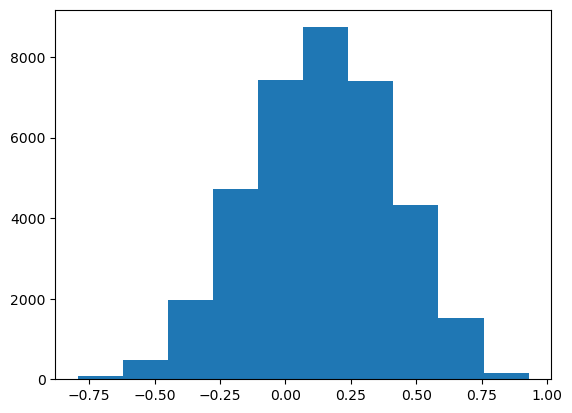

In [214]:
plt.hist(max_corr_loom_left)
plt.show()

In [427]:
centroids = data['centroids']
centroid_np = centroids.to_numpy()
centroid_1 = centroid_np[:,1]
centroid_2 = centroid_np[:,2]*-1
centroid_3 = centroid_np[tectum_ones[left_loom_indices],1]
centroid_4 = centroid_np[tectum_ones[left_loom_indices],2]*-1

# Handle right loom
centroid_5 = centroid_np[:,1]
centroid_6 = centroid_np[:,2]*-1
centroid_7 = centroid_np[tectum_ones[right_loom_indices],1]
centroid_8 = centroid_np[tectum_ones[right_loom_indices],2]*-1

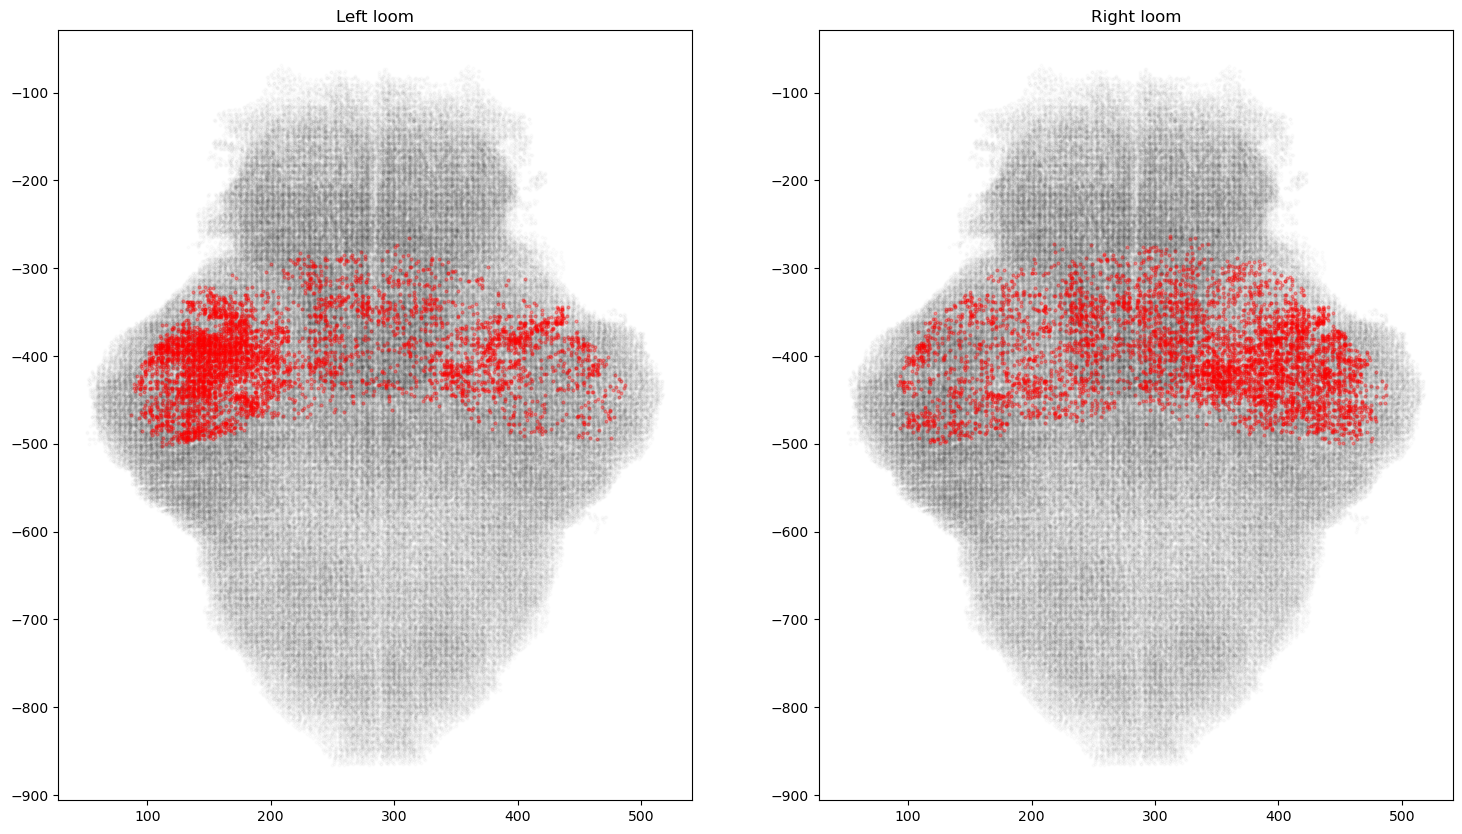

In [428]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex='col',figsize=(18, 10 ))
axs[0].scatter(centroid_1, centroid_2, s=4, c='k', alpha=0.01)
axs[0].scatter(centroid_3, centroid_4, s=4, c='r', alpha=0.3)
axs[1].scatter(centroid_5, centroid_6, s=4, c='k', alpha=0.01)
axs[1].scatter(centroid_7, centroid_8, s=4, c='r', alpha=0.3)
axs[0].set_title('Left loom')
axs[1].set_title('Right loom')
plt.show()

In [365]:
max_corr_loom_left.shape
genes = data['genes']
active_genes_tectum = genes.to_numpy()[left_loom_indices,:]